In [17]:
%matplotlib inline

from detector import detect_blobs

import sys

sys.path.append('./util/')
from util.Grapher import Grapher
from util.ImageGenerator import ImageGenerator
from util.ImageDrawer import ImageDrawer
from util.helper import (
    read_csv,
    txt_to_3pts,
    csv_to_3pts,
    euc_dist
)

from tifffile import imread

import matplotlib.pyplot as plt

from skimage.color import rgb2gray

import numpy as np


# Simulated Data

In [6]:
sim_stack = imread('simulated_data/blurred_147_cells.tif')
print('(z, y, x):')
print(img_stack.shape)

(z, y, x):
(100, 1000, 1000, 3)


In [7]:
print(sim_stack[:,:,:,0])

[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]


In [3]:
gray_img_stack = rgb2gray(img_stack)
print(gray_img_stack.shape)

(100, 1000, 1000)


In [5]:
blurred_147_cells_centroids = detect_blobs(gray_img_stack)

ValueError: threshold_otsu is expected to work with images having more than one color. The input image seems to have just one color 0.0.

# Real Data

In [2]:
real_centroids = detect_blobs('s3617_tifffile.tif')

In [23]:
print(real_centroids)

NameError: name 'real_centroids' is not defined

In [18]:
real_stack = imread('s3617_tifffile.tif')
print('(z, y, x):')
print(real_stack.shape)

(z, y, x):
(100, 1000, 1000)


In [20]:
stack = np.zeros((100, 1000, 1000, 3))
stack[:,:,:,0] = real_stack
stack[:,:,:,1] = real_stack
stack[:,:,:,2] = real_stack

In [34]:
saved_centroids = np.genfromtxt('blob_centroids.csv', delimiter=',', dtype=np.dtype(int))

In [41]:
print(saved_centroids)

[[  2  77   2]
 [  2 240   2]
 [  2 444   2]
 [  3 458   3]
 [  4 588   4]
 [  2 839   2]
 [  4 858   4]
 [  3 929   3]
 [  5 768   5]
 [  4 807   4]
 [  5 836   5]
 [  5 884   5]
 [  6 334   6]
 [  6 388   6]
 [  6 751   6]
 [  6  73   6]
 [  6 455   6]
 [  6 615   6]
 [  6 813   6]
 [  7 906   7]
 [ 10 156  10]
 [ 10 338  10]
 [ 12 332  12]
 [ 16  63  16]
 [ 17 187  17]
 [ 16 255  16]
 [ 17 264  17]
 [ 16 612  16]
 [ 27 234  27]
 [ 27 337  27]
 [ 28 406  28]
 [ 26 414  26]
 [ 27 553  27]
 [ 29 602  29]
 [ 32 423  32]
 [ 33 688  33]
 [ 32 766  32]
 [ 33 502  33]
 [ 33 311  33]
 [ 34 335  34]
 [ 34 394  34]
 [ 34 408  34]
 [ 33 500  33]
 [ 34 699  34]
 [ 37 386  37]
 [ 37 618  37]
 [ 41 424  41]
 [ 42 839  42]
 [ 48 329  48]
 [ 48 493  48]
 [ 48 528  48]
 [ 48 547  48]
 [ 50 659  50]
 [ 47 669  47]
 [ 52 323  52]
 [ 53 861  53]
 [ 53 598  53]
 [ 61 654  61]
 [ 58 803  58]
 [ 59 319  59]
 [ 59 402  59]
 [ 61 531  61]
 [ 60 554  60]
 [ 62 512  62]
 [ 61 806  61]
 [ 63 442  63]
 [ 68 554 

In [36]:
real_with_centers = ImageDrawer.draw_centers(stack, saved_centroids, (255,255,255), fname='s3617_centroids', copy=True)

('Saved tif as: ', 's3617_centroids.tif', ' at ', 's3617_centroids.tif')


In [37]:
print(real_with_centers.shape)

(100, 1000, 1000, 3)


In [38]:
real_stack_centroids = real_with_centers[:,:,:,0]

In [39]:
z_slice = real_stack_centroids[60,:,:]

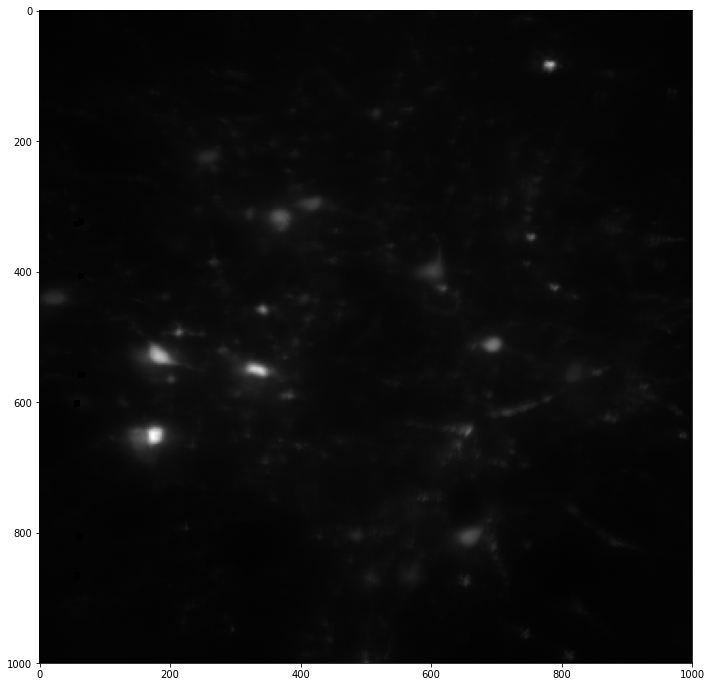

In [40]:
plt.figure(figsize=(12, 12))

# plt.imshow(z_slice, cmap='gray')
plt.imshow(z_slice, cmap=plt.cm.gray)